### Importing Libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [161]:
df = pd.read_csv('hotel_booking.csv')

### Exploratory Data Analysis and Data Cleaning

In [162]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#We have changed the datatype of this column from object to datetime.

In [164]:

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

### Handling missing values 

In [166]:
df.drop(['agent', 'company'], axis = 1, inplace = True)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [168]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [169]:

df.dropna(inplace = True)


In [170]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [171]:
for col in df.describe(include = object).columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

In [172]:
df = df[df['adr'] <5000]

In [173]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Data Analysis and Visualization

In [174]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


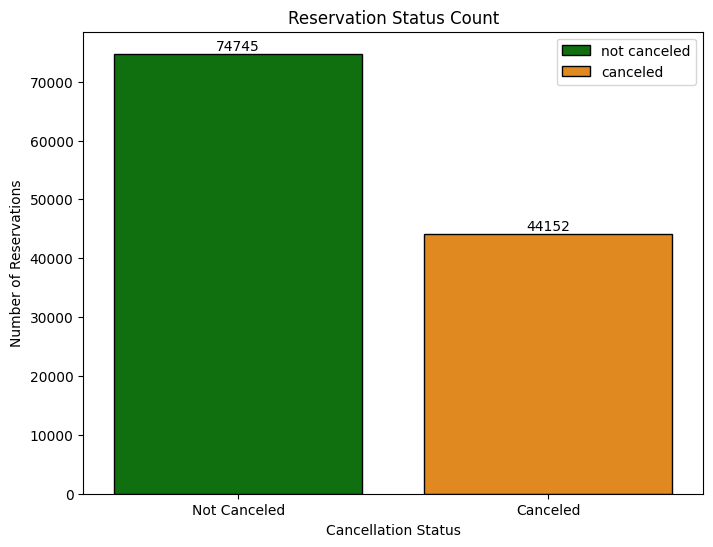

In [186]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="is_canceled", data=df, palette=['green', 'darkorange'], edgecolor="k", hue = "is_canceled")


for container in ax.containers:
    ax.bar_label(container)


plt.title("Reservation Status Count")
plt.ylabel("Number of Reservations")
plt.xlabel("Cancellation Status")
plt.legend(['not canceled','canceled'])
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])  
plt.show()

#from the above bar chart we can conclude that:
#The Non-Canceled Reservations significantly outnumber the Canceled ones, indicating that majority of Bookings are Honored.
#The higher count of non-canceled reservations suggests a relatively low overall cancellation rate in dataset.

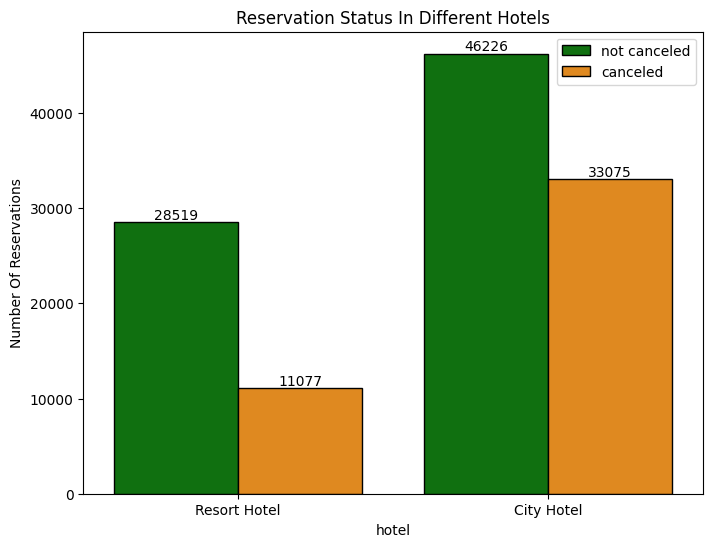

In [184]:

plt.figure(figsize = (8,6))
ax = sns.countplot(x = "hotel", data = df, palette = ['green', 'darkorange'], hue = "is_canceled", edgecolor = "k")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Reservation Status In Different Hotels")
plt.ylabel("Number Of Reservations")
plt.legend(['not canceled','canceled'])
plt.show()


#From the above chart we can conclude that Resort Hotel has lower cancellation Rate compared to City hotel.
#The number of canceled reservations at the Resort hotel is significantly smaller, indicating that guests at Resort hotels are more likely to honor their bookings.
#In Contrast, the City hotel experiences a Higher number of cancellations , which could be due to factors such as Location, Pricing or Customer behaviour

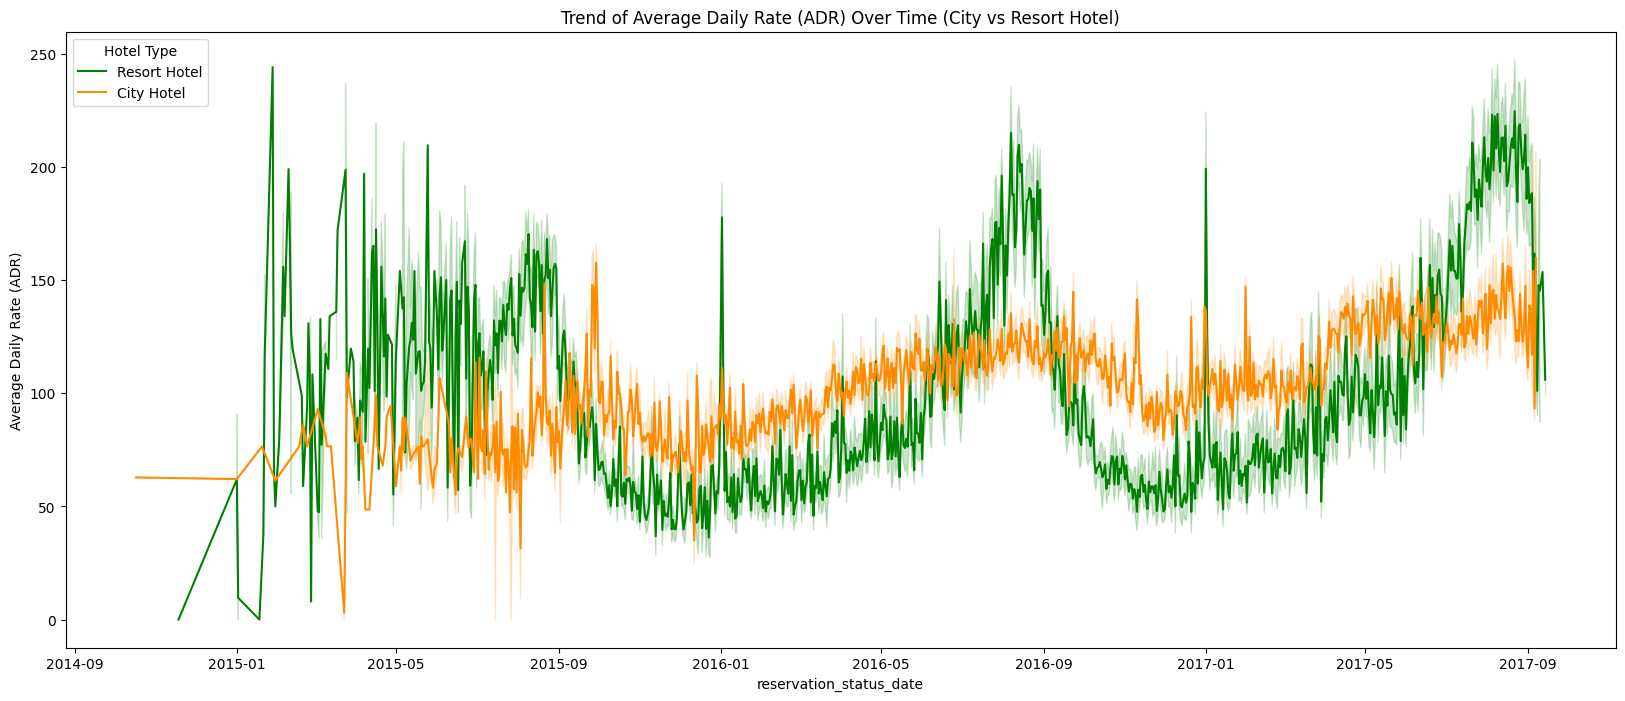

In [177]:
plt.figure(figsize = (20,8))
sns.lineplot(data = df, x = "reservation_status_date", y ="adr", hue = "hotel", palette = ['green', 'darkorange'])
plt.title("Trend of Average Daily Rate (ADR) Over Time (City vs Resort Hotel)")
plt.xlabel("reservation_status_date")
plt.ylabel("Average Daily Rate (ADR)")
plt.legend(title="Hotel Type")
plt.show()


#From the above chart we can conclude that:
#ADR for City Hotels follows relatively stable or moderate trends with some fluctuations.
#ADR for Resort Hotels appears to experience more significant changes, with noticable increases and decreases.
#Resort Hotels generally show higher ADR values compared to City Hotel.

In [178]:
df['Month'] = df['reservation_status_date'].dt.month

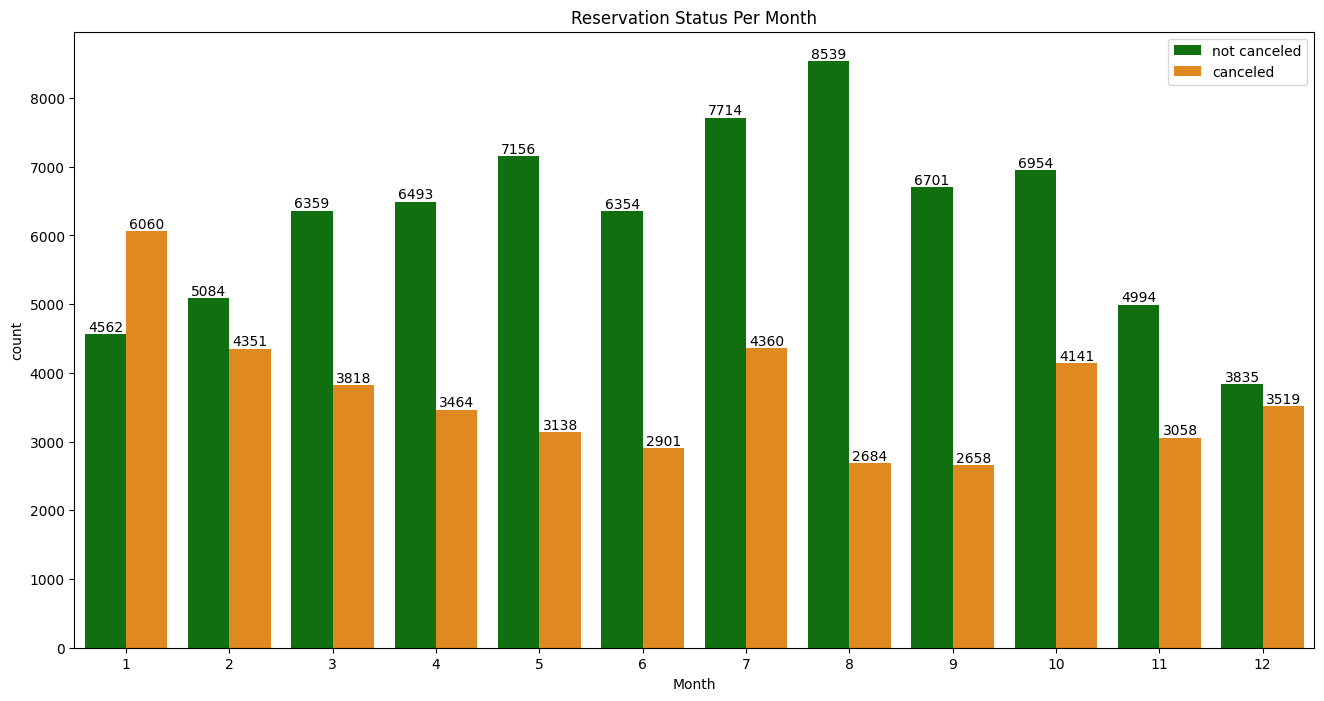

In [183]:
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = "Month",data = df,  hue = "is_canceled", palette =['green', 'darkorange'])
for container in ax1.containers:
    ax1.bar_label(container)

plt.title("Reservation Status Per Month")
plt.legend(['not canceled','canceled'])
plt.show()


#From the above Bar Graph we can conclude that:
#The Highest Number of cancellations occured in the month of January.
#The Lowest Number of Cancellations ocuured in the month of September.

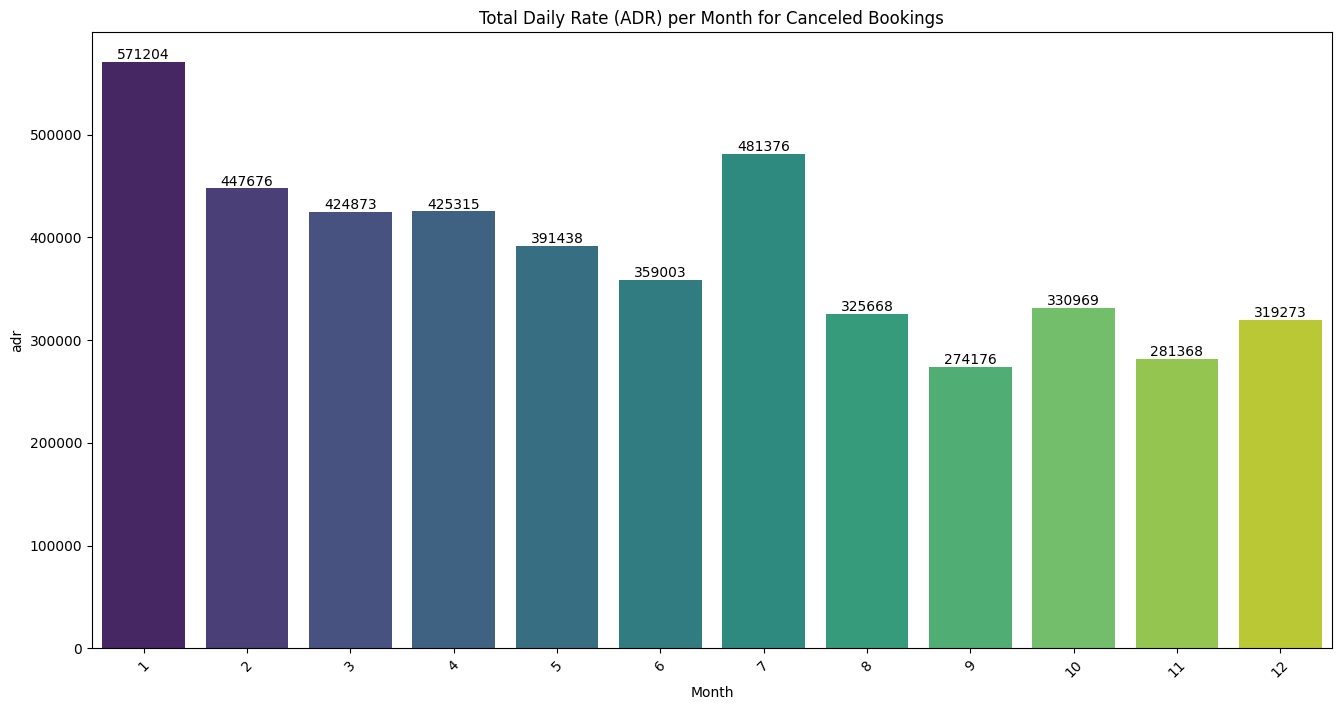

In [181]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x = "Month", y = "adr", data = df[df['is_canceled'] == 1].groupby("Month")['adr'].sum().reset_index(), palette = 'viridis')


plt.title('Total Daily Rate (ADR) per Month for Canceled Bookings')
plt.xticks(rotation = 45)

for container in ax.containers:
    ax.bar_label(container)

plt.show()




#From the Above Chart We can conclude that:
#The Month with the lowest Total ADR for canceled bookings is september, with an ADR of 274,176.
#Whereas the Highest Total ADR for canceled bookings is in the month of January, with an ADR of 571,204.

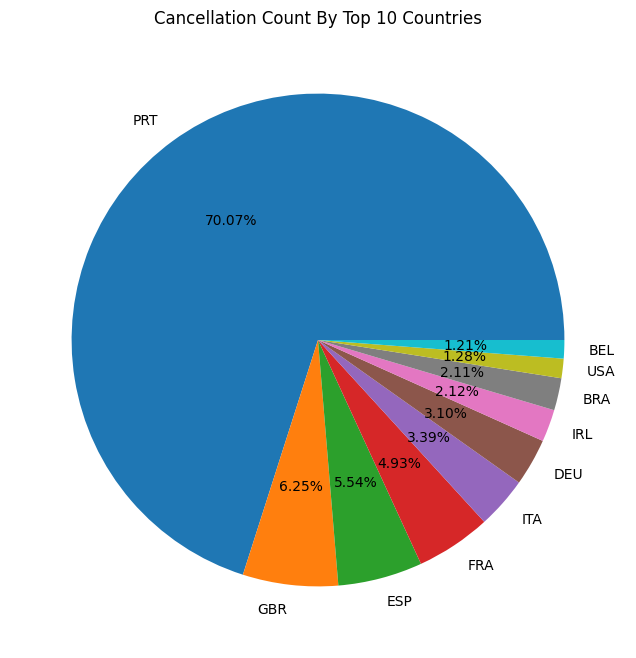

In [182]:
canceled_data = df[df['is_canceled'] == 1]

top_10_countries = canceled_data['country'].value_counts()[:10]

plt.figure(figsize=(8,8))
plt.pie(top_10_countries.values, autopct="%1.2f%%", labels=top_10_countries.index)
plt.title("Cancellation Count By Top 10 Countries")
plt.show()


#The pie chart indicates that Portugal(PRT) has the highest proportion of Cancellations among the Top 10 Countries ,suggesting bookings Originating from this country are more likely to be canceled compared to others.

In [197]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

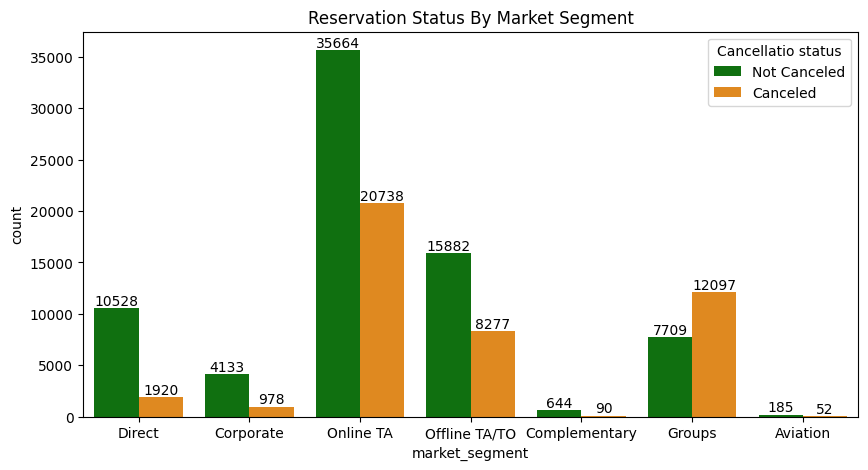

In [233]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = "market_segment", data = df, hue = "is_canceled", palette = ['green','darkorange'])
for container in ax.containers:
    ax.bar_label(container)
plt.legend(title = "Cancellatio status", labels = ['Not Canceled', 'Canceled'])
plt.title("Reservation Status By Market Segment")
plt.show()

#The bar plot reveals that the highest number of cancellations occured within the "Online Travel Agents" (Online TA) of Market segment , which also has the largest share of overall bookings.
#This indicates that, while Online TA generates most reservations, it is also associated with significant proportion of cancellations.

In [198]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [200]:
df[df['is_canceled'] == 1]['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

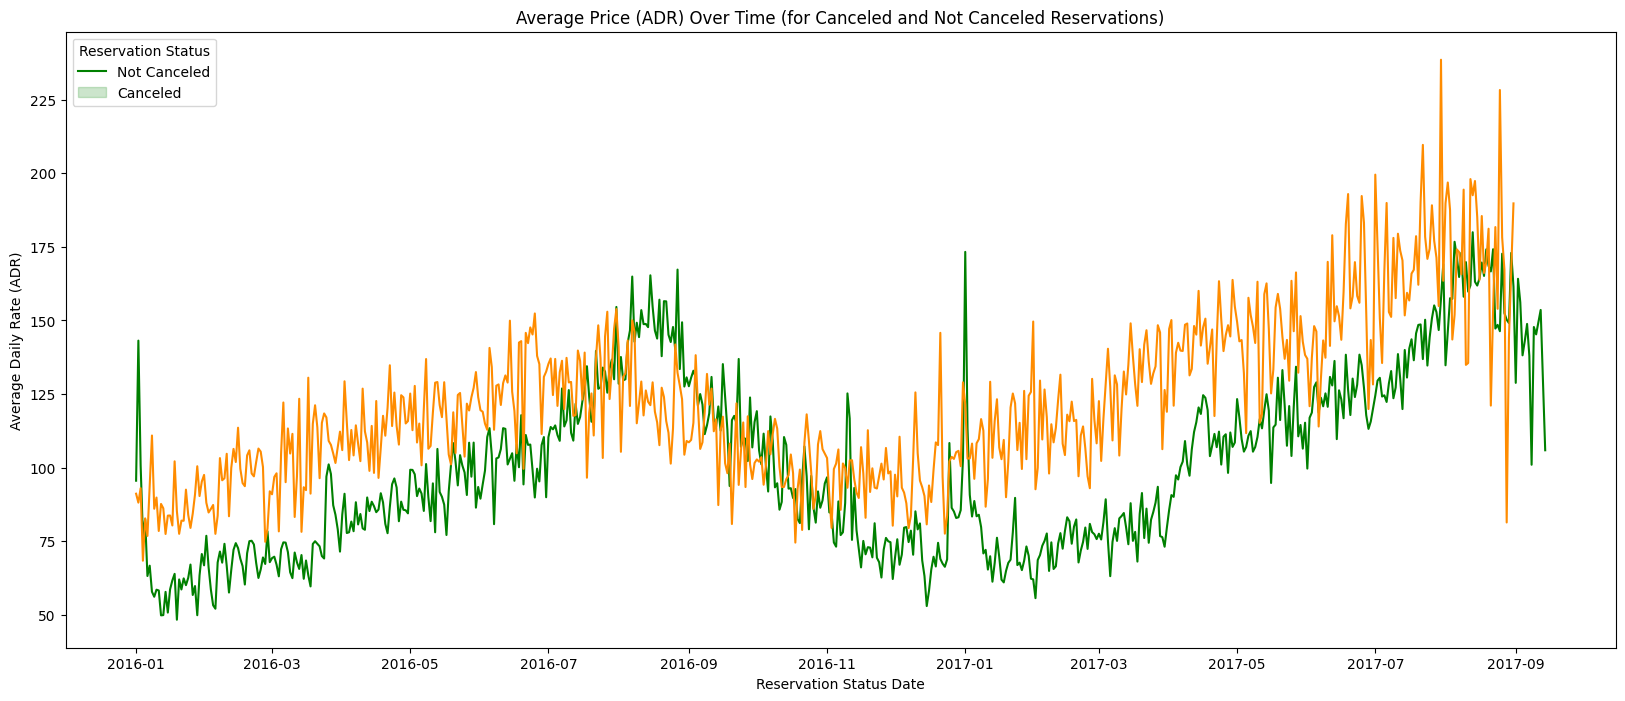

In [232]:
df_filtered = df[(df['reservation_status_date'] >= '2016-01-01') & (df['reservation_status_date'] <= '2017-09-30')]

avg_price = df_filtered.groupby(['reservation_status_date', 'is_canceled'])['adr'].mean().reset_index()


plt.figure(figsize=(20, 8))
sns.lineplot(data=avg_price, x='reservation_status_date', y='adr', hue='is_canceled',  palette=['green', 'darkorange'])

plt.title("Average Price (ADR) Over Time (for Canceled and Not Canceled Reservations)")
plt.xlabel("Reservation Status Date")
plt.ylabel("Average Daily Rate (ADR)")
plt.legend(title="Reservation Status", labels=['Not Canceled', 'Canceled'])

plt.show()


#This Above Charts Proves that:
#When the Average Daily Rate(ADR) is Higher, the number of cancellations tends to be Higher as well.
#Coversly, When the ADR is Lower , the cancellations are also generally lower.

In [211]:
df.describe(include = object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79301,13852,91862,48585,56402,97729,85600,73862,104163,89173,74745


In [214]:
df['distribution_channel'].value_counts(normalize = True)

distribution_channel
TA/TO        0.821964
Direct       0.121811
Corporate    0.054593
GDS          0.001623
Undefined    0.000008
Name: proportion, dtype: float64

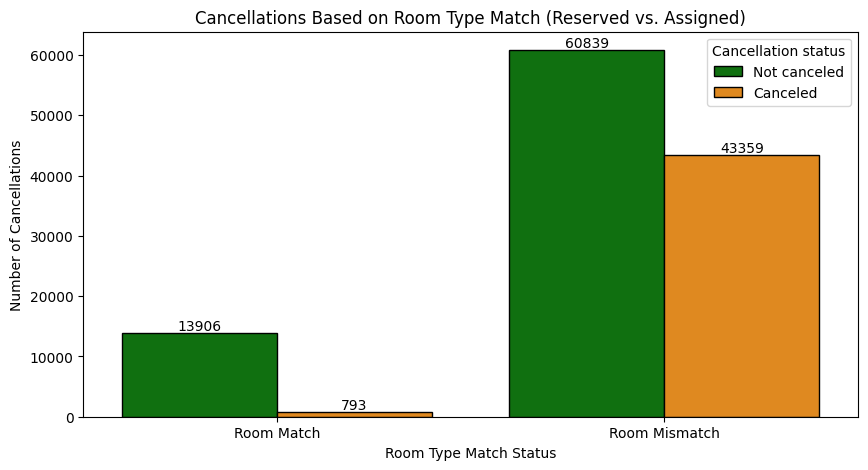

In [230]:
df['room_type_match'] = df['reserved_room_type'] == df['assigned_room_type']

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='room_type_match', data=df, hue = "is_canceled",  palette=['green', 'darkorange'], edgecolor='k')


for container in ax.containers:
    ax.bar_label(container)

ax.set_xticklabels(['Room Match', 'Room Mismatch'])


plt.title("Cancellations Based on Room Type Match (Reserved vs. Assigned)")
plt.xlabel("Room Type Match Status")
plt.ylabel("Number of Cancellations")

plt.legend(title = "Cancellation status", labels = ['Not canceled', 'Canceled'])


plt.show()


#The Cancellation rate is higher when the room type is mismatched, with 43359 cancellations out of the total number of reservations that are not canceled.
#The Cancellation rate is much lower when the room type matches, with only 793 cancellations out of the total number of reservations that are not canceled.
#The mismatch between reserved and assigned room types is a significant factor driving cancellations.